## Objective of this notebook is to to train a model to recognize handwritten digits (0-9) using the MNIST dataset and later showcase the results on a web platform.. The notebook wull first cover the first part of the goal.

In [4]:
!pip install opencv-python numpy matplotlib pillow scikit-image torch torchvision


## Loading MNIST Dataset using Pytoch

100%|██████████████████████████████████████| 9.91M/9.91M [00:02<00:00, 3.84MB/s]
100%|██████████████████████████████████████| 28.9k/28.9k [00:00<00:00, 1.04MB/s]
100%|██████████████████████████████████████| 1.65M/1.65M [00:01<00:00, 1.11MB/s]
100%|██████████████████████████████████████| 4.54k/4.54k [00:00<00:00, 2.99MB/s]


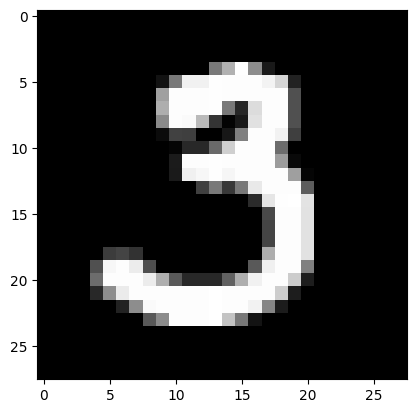

Label: 3


In [2]:
import torch
import torchvision
import torchvision.transforms as transforms

# Load the MNIST dataset
transform = transforms.Compose([transforms.ToTensor()])
trainset = torchvision.datasets.MNIST(root='./data', train=True, download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=32, shuffle=True)

# Show sample images
import matplotlib.pyplot as plt
import numpy as np

def imshow(img):
    img = img.numpy().squeeze()
    plt.imshow(img, cmap='gray')
    plt.show()

# Get one batch
dataiter = iter(trainloader)
images, labels = next(dataiter)

# Show first image
imshow(images[0])
print(f'Label: {labels[0].item()}')


## Dataset exploration

Total images: 60000
Total classes: 10


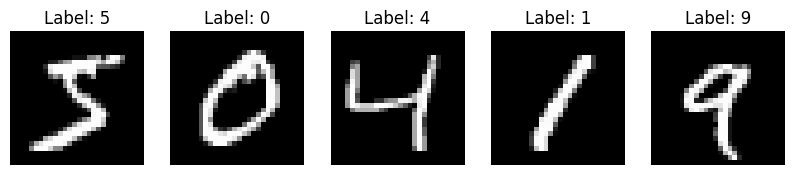

In [5]:
import matplotlib.pyplot as plt
import numpy as np

# Get dataset statistics
num_images = len(trainset)
num_classes = len(set(trainset.targets.numpy()))

print(f"Total images: {num_images}")
print(f"Total classes: {num_classes}")

# Show 5 random images
fig, axes = plt.subplots(1, 5, figsize=(10, 3))
for i in range(5):
    image, label = trainset[i]
    axes[i].imshow(image.squeeze(), cmap='gray')
    axes[i].set_title(f"Label: {label}")
    axes[i].axis('off')

plt.show()


## Preprocessing and Splitting the Dataset


## we need to prepare the dataset for training. This involves:
1. Normalizing the Images – Since pixel values range from 0-255, we scale them to a range of 0-1 for better training efficiency.
2. Converting to Tensors – Ensuring the dataset is in the correct format for PyTorch models.
3. Splitting into Training & Testing Sets – To evaluate how well the model generalizes.


In [6]:
import torch
import torchvision.transforms as transforms
from torch.utils.data import random_split, DataLoader

# Define transformations (Normalize to [0,1] and convert to tensor)
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5,), (0.5,))  # Normalize between -1 and 1
])

# Reload dataset with transformations applied
trainset = torchvision.datasets.MNIST(root='./data', train=True, download=True, transform=transform)
testset = torchvision.datasets.MNIST(root='./data', train=False, download=True, transform=transform)

# Define batch size
batch_size = 32

# Create data loaders
trainloader = DataLoader(trainset, batch_size=batch_size, shuffle=True)
testloader = DataLoader(testset, batch_size=batch_size, shuffle=False)

# Print dataset sizes
print(f"Training samples: {len(trainset)}")
print(f"Testing samples: {len(testset)}")


Training samples: 60000
Testing samples: 10000


## Building a Basic Model

## We’ll now build a simple neural network to classify handwritten digits. This model will:
1. Take a 28x28 grayscale image as input
2. Flatten the image into a 1D array (since neural networks process vectors, not 2D images)
3. Use two fully connected layers with activation functions
4. Output predictions for digits 0-9 (10 classes)


In [8]:
import torch.nn as nn
import torch.optim as optim

# Define the neural network
class SimpleNN(nn.Module):
    def __init__(self):
        super(SimpleNN, self).__init__()
        self.fc1 = nn.Linear(28*28, 128)  # First hidden layer
        self.fc2 = nn.Linear(128, 64)     # Second hidden layer
        self.fc3 = nn.Linear(64, 10)      # Output layer (10 classes)

    def forward(self, x):
        x = x.view(-1, 28*28)  # Flatten image to 1D vector
        x = torch.relu(self.fc1(x))  # Apply ReLU activation
        x = torch.relu(self.fc2(x))
        x = self.fc3(x)  # Output layer (no activation, as we'll use CrossEntropyLoss)
        return x

# Instantiate the model
model = SimpleNN()

# Define the loss function and optimizer
criterion = nn.CrossEntropyLoss()  # Suitable for multi-class classification
optimizer = optim.Adam(model.parameters(), lr=0.001)  # Adam optimizer

# Print model architecture
print(model)


SimpleNN(
  (fc1): Linear(in_features=784, out_features=128, bias=True)
  (fc2): Linear(in_features=128, out_features=64, bias=True)
  (fc3): Linear(in_features=64, out_features=10, bias=True)
)


## Train the model

In [ ]:
num_epochs = 5

for epoch in range(num_epochs):
    running_loss = 0.0

    for batch_idx, (images, labels) in enumerate(trainloader):
        optimizer.zero_grad()  # Zero the gradients
        outputs = model(images)  # Forward pass
        loss = criterion(outputs, labels)  # Compute loss
        loss.backward()  # Backward pass
        optimizer.step()  # Update weights

        running_loss += loss.item()
        
        # Print every 100 batches to see progress
        if batch_idx % 100 == 0:
            print(f"Epoch {epoch+1}, Batch {batch_idx}, Loss: {loss.item():.4f}")

    # Print epoch-level loss
    print(f"Epoch {epoch+1}/{num_epochs}, Avg Loss: {running_loss / len(trainloader):.4f}")

print("Training complete!")
